# Titanic生还数据分析报告

1912年4月14日23时40分左右，泰坦尼克号与一座冰山相撞，造成右舷船艏至船中部破裂，五座水密舱进水。次日凌晨2时20分左右，泰坦尼克船体断裂成两截后沉入大西洋底3700米处。2224名船员及乘客中，逾1500人丧生。(https://baike.baidu.com/item/%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7/5677)

此项分析报告旨在探索Titanic事件乘客生还情况和几个因素之间的关系。<br>
探索的几个因变量为船舱等级、性别和年龄。除此之外，也会进行每等船舱内生还情况和性别之间的关系。
从2224名船员及乘客中抽取891名作为样本。


数据代码解释：<br>
pclass: Ticket Class<br>
        1 = Upper, 2 = Middle, 3 = Lower
        
Age: Age in years

sibsp: number of siblings/sprouse aboard

parcf: number of parents/children aboard 

cabin: Cabin number

Embarked: C = Cherbourg, Q = Queenstown, S = Southampton

Key<br>
0 = No
1 = Yes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#读取文件
titanic_data = pd.read_csv('train.csv')

In [3]:
#查看文件前10行
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#看数据大致信息
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


可以看到此数据库里有891位乘客。有大约38%的乘客生还。并且Age/Cabin/Embarked 等字段有信息缺失。
在此次分析中，登陆港口，姓名还有Ticket和生还几率没有太大相关性，所以先去掉。
通过常识可以知道船舱级别越高，船票价格越高，是有相关性的。所以暂时不予考虑费率问题，Fare去掉。

In [5]:
#查看缺少的数据
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

从表中可以看出年龄891个乘客中有177个缺少年龄的记录；Cabin缺少687个记录。

In [6]:
titanic = titanic_data.drop(['Name', 'Ticket', 'Embarked', 'Fare'], axis = 1)

In [7]:
#把有缺少年龄记录的行去掉
titanic_df = titanic.dropna(subset=['Age'])

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Cabin          185 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 50.2+ KB


现在信息上面显示有效信息乘客714名，以下的探索就基于容量为714人的样本来分析。

In [9]:
#891人中的生还人数
total_survived_sum = titanic_df['Survived'].sum()
total_unsurvived_sum = 891 - total_survived_sum
print('生还者 =', total_survived_sum)
print('未生还者 =', total_unsurvived_sum)

生还者 = 290
未生还者 = 601


Text(0.5,1,'Survival and Unsurvival Count')

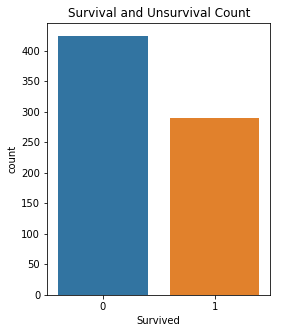

In [10]:
#生还和未生还柱形图
plt.figure(figsize = (4,5))
sns.countplot(x = 'Survived', data =titanic_df)
plt.title('Survival and Unsurvival Count')

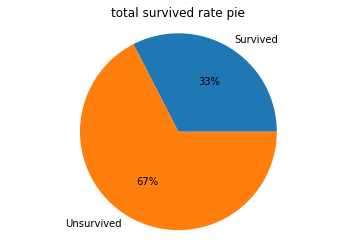

In [11]:
#生还和未生还百分比饼图
plt.pie([total_survived_sum, total_unsurvived_sum], labels = ['Survived', 'Unsurvived'], autopct = '%1.0f%%')
plt.title('total survived rate pie')
plt.axis('equal')
plt.show()

## __不同级别船舱生还人数比较__

In [12]:
#各船舱人数
class_count = titanic_df.groupby(['Pclass']).count()
print(class_count)

        PassengerId  Survived  Sex  Age  SibSp  Parch  Cabin
Pclass                                                      
1               186       186  186  186    186    186    160
2               173       173  173  173    173    173     15
3               355       355  355  355    355    355     10


1级船舱总人数: 186;<br>
2级船舱总人数: 173;<br>
3级船舱总人数: 355<br>

Text(0.5,1,'Passenger Count for Each Class')

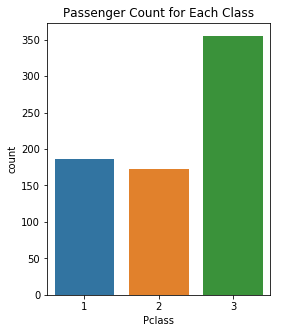

In [13]:
plt.figure(figsize =(4,5))
sns.countplot(x = 'Pclass', data = titanic_df)
plt.title('Passenger Count for Each Class')

In [14]:
#生还的所有人
survived = titanic_df[titanic_df['Survived'] ==1]

In [15]:
#不同船舱生还人数比较
class_survived_count = survived[['Pclass', 'Survived']].groupby(['Pclass']).count()
print(class_survived_count)

        Survived
Pclass          
1            122
2             83
3             85


1级船舱生还人数: 122人;<br>
2级船舱生还人数: 83人;<br>
3级船舱生还人数: 85人<br>

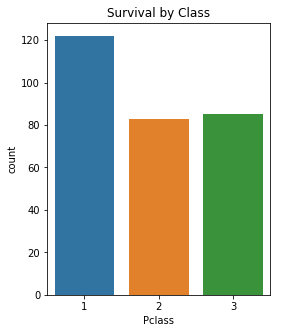

In [16]:
plt.figure(figsize=(4,5))
sns.countplot(x = 'Pclass',data = survived)
plt.title('Survival by Class')
plt.show()

In [17]:
#不同船舱分别的生还几率
class1 = titanic_df[titanic_df['Pclass'] == 1]
class2 = titanic_df[titanic_df['Pclass'] == 2]
class3 = titanic_df[titanic_df['Pclass'] == 3]

class_count_drop = class_count.drop(['PassengerId', 'Sex', 'Age', 'SibSp', \
                                     'Parch', 'Cabin'], axis = 1)
print(class_count_drop)
print('________________')
class_survived_per = class_survived_count/class_count_drop
print(class_survived_per*100)

        Survived
Pclass          
1            186
2            173
3            355
________________
         Survived
Pclass           
1       65.591398
2       47.976879
3       23.943662


1级船舱生还率:66%<br>
2级船舱生还率:48%<br>
3级船舱生还率:25% <br>
根据数据显示，船舱等级越高，生还几率越大。


## __不同性别生还情况比较__

In [18]:
male_sum =  titanic_df['Sex'][titanic_df['Sex'] == 'male'].count()
female_sum = titanic_df['Sex'][titanic_df['Sex'] == 'female'].count()
print('男性 = ', male_sum)
print('女性 = ', female_sum)

男性 =  453
女性 =  261


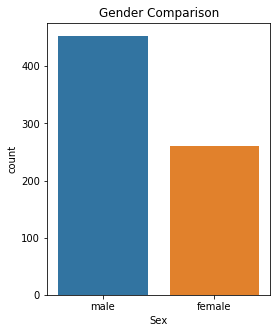

In [19]:
plt.figure(figsize = (4,5))
sns.countplot(x = 'Sex', data = titanic_df)
plt.title('Gender Comparison')
plt.show()

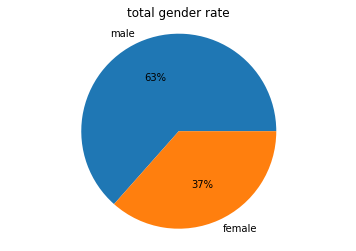

In [20]:
plt.pie([male_sum,female_sum], labels = ['male', 'female'], autopct = '%1.0f%%')
plt.axis('equal')
plt.title('total gender rate')
plt.show()

该数据包含男性453人，占数据总人63%；女性3261人，占数据总人数37%。<br>

In [21]:
survived_male_count = survived ['Sex'][survived['Sex'] == 'male'].count()
survived_female_count = survived['Sex'][survived['Sex'] == 'female'].count()
print('男性生还人数 =', survived_male_count )
print('女性生还人数 =', survived_female_count)

男性生还人数 = 93
女性生还人数 = 197


(-1.1093217841770153,
 1.1004438944846198,
 -1.1055429239644323,
 1.1089348035806634)

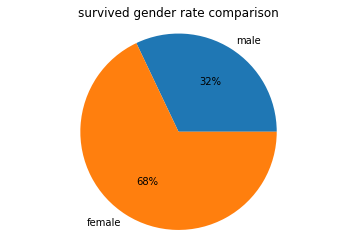

In [22]:
plt.pie([survived_male_count, survived_female_count],\
        labels = ['male', 'female'],\
        autopct = '%1.0f%%' )
plt.title('survived gender rate comparison')
plt.axis('equal')

事件发生后，男生生还人数93人，占生还总人数68%；女性生还人数197人，占生还总人数32%。

In [23]:
round_male = (survived_male_count/male_sum)*100
round_female = (survived_female_count/female_sum)*100
print('男性生还率', round(round_male,2))
print('女性生还率', round(round_female,2))

男性生还率 20.53
女性生还率 75.48


### 各舱级不同性别生还率比较

In [24]:
#各舱级不同性别生还情况
survived_byclass = survived.groupby(['Pclass', 'Sex']).count()['Survived']

In [25]:
#各舱级不同性别分组
total_byclass = titanic_df.groupby(['Pclass','Sex']).count()['Survived']

Text(0.5,1,'Survived rate by gender within classes')

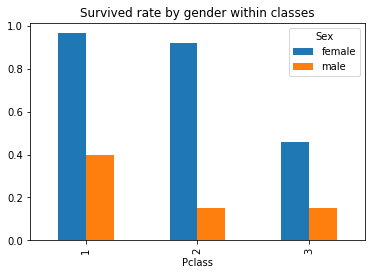

In [26]:
#各舱级不同性别生还率
(survived_byclass/total_byclass).unstack().plot.bar()
plt.title('Survived rate by gender within classes')

根据图中所示，每个舱级中女性生还率均高于男性生还率

## __不同年龄生还情况比较__

__由于年龄中丢失的记录比较多，要把无效值的行去掉。__

In [27]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

样本数据显示714位乘客中，年龄平均数为30岁。
最小的年龄不到1岁，最大的年龄为80岁。

In [28]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

In [29]:
#按年龄进行分组，分别为 10岁以下，10-30岁，30-50岁，50-70岁，70岁以上，并计算每组总人数
bins = [0,10,30,50,70,100]
titanic_df['Age_group'] = pd.cut(titanic_df['Age'],bins)
total_byage = titanic_df.groupby(['Age_group'])['PassengerId'].count()
print(total_byage)

Age_group
(0, 10]       64
(10, 30]     345
(30, 50]     241
(50, 70]      59
(70, 100]      5
Name: PassengerId, dtype: int64


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


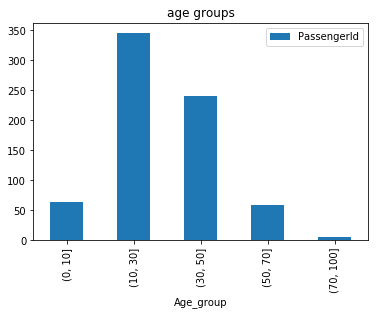

In [30]:
total_byage.plot(kind = 'bar')
plt.title('age groups')
plt.legend()

In [31]:
#计算每个年龄分组生还率
#http://python.jobbole.com/85742/
bins = [0,10,30,50,70,100]
titanic_df['Age_group'] = pd.cut(titanic_df['Age'],bins)
by_age = titanic_df.groupby('Age_group')['Survived'].mean()
print(by_age)

Age_group
(0, 10]      0.593750
(10, 30]     0.371014
(30, 50]     0.423237
(50, 70]     0.355932
(70, 100]    0.200000
Name: Survived, dtype: float64


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


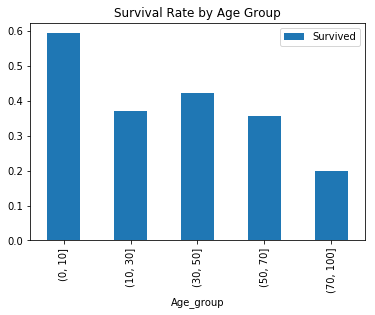

In [32]:
by_age.plot(kind = 'bar')
plt.title('Survival Rate by Age Group')
plt.legend()

In [33]:
survived['Age_group'] = pd.cut(titanic_df['Age'],bins)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
#按年龄分组计算每组生还的人数
survived_byage = survived.groupby(['Age_group']).count()['Survived']
print(survived_byage)

Age_group
(0, 10]       38
(10, 30]     128
(30, 50]     102
(50, 70]      21
(70, 100]      1
Name: Survived, dtype: int64


In [35]:
#计算每组生还率
print(survived_byage/total_byage)

Age_group
(0, 10]      0.593750
(10, 30]     0.371014
(30, 50]     0.423237
(50, 70]     0.355932
(70, 100]    0.200000
dtype: float64


各年龄分组生还率分别为: 0.59,0.37,0.42,0.36,0.20

# 总结<br>
本次分析旨在探索泰坦尼克号上的生还率与船舱等级、年龄、和性别三个因素上的关系。
清理前的样本容量为891，数据清理去掉缺少有效年龄的乘客信息后为714。因去除的信息具随机性，虽然和样本为891的计算结果有偏差，但清理后的样本依然具有代表性。事件发生后，样本内有290人生还，占总人数33%。
### 船舱
该样本显示泰坦尼克号上一共有3级船舱。一等舱有186人，二等舱有173人，三等舱有355人。
事件发生后，一等舱136人生还，二等舱87人生还，三等舱119人生还。生还率分别为66%, 48%,25%。
该样本显示，船舱等级越高生还率越高。此次分析中还探索了各船舱等级中不同性别中的生还率，1，2，3级船舱女性生还率均高于男性，并且高等级船舱女性生还率依次高于较低一等级船舱女性的生还率。
### 性别
该样本714人中，男性有453人，女性有261人，男女比例为63%和37%。事件发生后，男性生还93人，女性生还197人。
男性生还率为32%，女性生还率为68%。女性远远高于男性，不知是否真的像电影中所演的事情发生后，男性积极遵守女士优先的原则而造成的这一结果。
### 年龄
把该样本年龄分成五组分别为 10岁以下，10-30岁，30-50岁，50-70岁，70岁以上。生还率分别为0.59,0.37,0.42,0.36,0.20。由该样本所见，年龄越大生还率越低。

# 分析限制讨论

该样本容量为714，总体为2224，说明该样本够大，分析结果具有代表性。
分析结果得出的相关关系不代表因果关系，也有很多其他可能性影响着结果。如：乘客是否会游泳，事件发生时乘客所在轮船的位置等。